In [1]:
# Importando das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from pycaret.regression import *
from scipy.stats import chi2_contingency
from pycaret.classification import setup, compare_models, create_model, tune_model, evaluate_model, finalize_model, predict_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

In [2]:
# Importando os arquivos
heroes_info = pd.read_csv('C:/Users/roger/Documents/Teste Técnico Alelo/heroes_information.csv')
super_powers = pd.read_csv('C:/Users/roger/Documents/Teste Técnico Alelo/super_hero_powers.csv')

In [3]:
heroes_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
super_powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Removendo a coluna 'Unnamed: 0'
heroes_info.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Listando os nomes das colunas
column_names = super_powers.columns
print(column_names)

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)


In [7]:
# Alterando os valores  "False" para "0" e "True" para "1"
super_powers=super_powers*1
super_powers.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Abraxas,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Absorbing Man,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Adam Monroe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Adam Strange,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Agent Bob,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Criando a coluna 'Total de Poder' com a soma das colunas de poderes de cada super herói
super_powers.loc[:,'Total de Poder'] = super_powers.iloc[:, 1:].sum(axis=1)
display(super_powers)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Total de Poder
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
663,Ymir,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
664,Yoda,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,19
665,Zatanna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [9]:
# Alterando o nome do campo 'hero_names' para 'name' na tabela super_powers  
super_powers.rename(columns={'hero_names': 'name'}, inplace=True)

In [10]:
# Estatísticas descritivas para os campos numéricos
estatisticas_descritivas = heroes_info.describe()
print(estatisticas_descritivas)

           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


In [11]:
#Corrigindo os dados nulos e incorretos. 
heroes_info['Weight'].replace(-99.0, np.nan, inplace=True) #Substitui o valor -99.0 na coluna Weight por NaN (valor ausente)
heroes_info['Height'].replace(-99.0, np.nan, inplace=True) #Substitui o valor -99.0 na coluna Height por NaN (valor ausente)
heroes_info.replace('-', np.nan,inplace=True) #Substitui todos os valores '-'  por NaN

In [12]:
# Checando os dados faltantes
heroes_info.info()
super_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      705 non-null    object 
 2   Eye color   562 non-null    object 
 3   Race        430 non-null    object 
 4   Hair color  562 non-null    object 
 5   Height      517 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  72 non-null     object 
 8   Alignment   727 non-null    object 
 9   Weight      495 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 169 entries, name to Total de Poder
dtypes: int32(167), int64(1), object(1)
memory usage: 445.7+ KB


In [13]:
# Checando os casos válidos
heroes_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      705 non-null    object 
 2   Eye color   562 non-null    object 
 3   Race        430 non-null    object 
 4   Hair color  562 non-null    object 
 5   Height      517 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  72 non-null     object 
 8   Alignment   727 non-null    object 
 9   Weight      495 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [14]:
# Deletando a variável 'Skin color' devido a quantidade de missings
heroes_info = heroes_info.drop('Skin color', axis=1)

In [15]:
# Unindo os arquivos com base na coluna comum 'name'
super_heroes = pd.merge(heroes_info, super_powers, on='name')
super_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Columns: 177 entries, name to Total de Poder
dtypes: float64(2), int32(167), int64(1), object(7)
memory usage: 482.2+ KB


In [16]:
# Listando os casos do dataframe
display(super_heroes)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Total de Poder
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,0,...,0,0,0,0,0,0,0,0,0,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,1,...,0,0,0,0,0,0,0,0,0,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,0,...,0,0,0,0,0,0,0,0,0,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,0,...,0,0,0,0,0,0,0,0,0,8
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN,0,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0,0,...,0,0,0,0,0,0,0,0,0,3
656,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,good,NaN,0,...,0,0,0,0,0,0,0,0,0,6
657,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,good,17.0,1,...,0,0,0,0,0,0,0,0,0,19
658,Zatanna,Female,blue,Human,Black,170.0,DC Comics,good,57.0,0,...,0,0,0,0,0,0,0,0,0,8


In [17]:
# Contando o número de valores 'NaN' nas colunas 'Weight' e 'Height'
missing_values = super_heroes[['Weight', 'Height']].isnull().sum()
print(missing_values)

Weight    192
Height    170
dtype: int64


In [18]:
# Calculando a média para 'Weight' e 'Height' agrupada por 'Gender'
mean_values = super_heroes.groupby(['Gender'])[['Weight', 'Height']].transform('mean')

In [19]:
# Preenchendo os valores ausentes com as médias calculadas
super_heroes[['Weight', 'Height']] = super_heroes[['Weight', 'Height']].fillna(mean_values)

In [20]:
# Contando o número de valores 'NaN' nas colunas 'Weight' e 'Height'
missing_values = super_heroes[['Weight', 'Height']].isnull().sum()
print(missing_values)

Weight    10
Height     9
dtype: int64


In [21]:
# Imputando a média da coluna nos valores missing para 'Weight' e 'Height'
super_heroes['Weight'].fillna(super_heroes['Weight'].mean(), inplace=True)
super_heroes['Height'].fillna(super_heroes['Height'].mean(), inplace=True)

In [22]:
# Verificando se ainda há valores missing nessas colunas
print(super_heroes[['Weight', 'Height']].isna().sum())

Weight    0
Height    0
dtype: int64


In [23]:
# Verificando valores faltantes
total = super_heroes.isnull().sum()
percent = (super_heroes.isnull().sum()/super_heroes.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
name,0,0.000000
Gender,18,0.027273
Eye color,131,0.198485
Race,247,0.374242
Hair color,132,0.200000
...,...,...
Molecular Dissipation,0,0.000000
Vision - Cryo,0,0.000000
Omnipresent,0,0.000000
Omniscient,0,0.000000


In [24]:
# Verificando linhas duplicadas
num_duplicada = len(super_heroes[super_heroes.duplicated()])
print(num_duplicada)

0


# Clustering

# Questões 1 e 2 - Agrupando os super-heróis

In [25]:
# Selecionando as variáveis 'Height', 'Weight' e 'Total de Poder' para o cluster
X = super_heroes[['Height', 'Weight', 'Total de Poder']]

In [26]:
# Lista para armazenar a inércia que é a soma dos erros quadráticos
inertia = []

In [27]:
# Testando diferentes números de clusters 
cluster_range = range(1, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

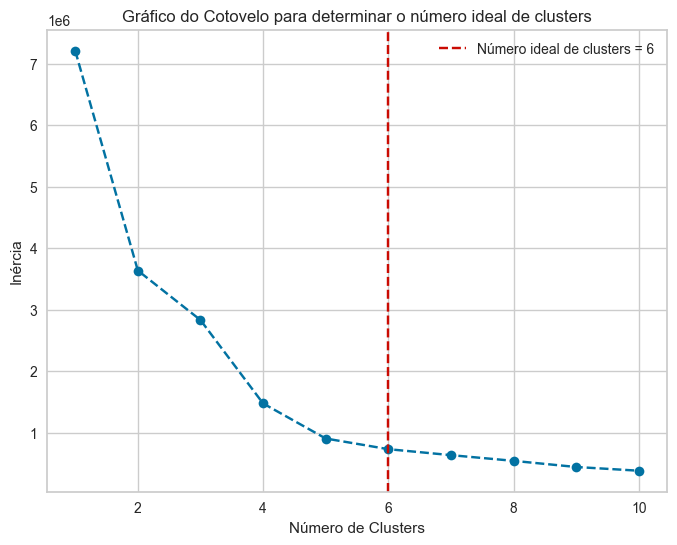

In [28]:
# Plotando o gráfico de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.axvline(x=6, color='r', linestyle='--', label='Número ideal de clusters = 6') 
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Gráfico do Cotovelo para determinar o número ideal de clusters')
plt.legend()  
plt.grid(True)
plt.show()

In [29]:
# Executando o algoritmo K-Means com 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
super_heroes['Cluster'] = kmeans.fit_predict(X)

In [30]:
# Avaliando o resultado do Cluster

In [31]:
# Exibindo a frequência dos grupos
super_heroes['Cluster']. value_counts()

Cluster
0    348
4    240
5     37
1     26
2      6
3      3
Name: count, dtype: int64

In [32]:
# Verificando a dependência dos grupos em relação ao gênero
crosstab = pd.crosstab(super_heroes['Gender'], super_heroes['Cluster'], margins=True)
print(crosstab)

Cluster    0   1  2  3    4   5  All
Gender                              
Female   160   3  1  0   10   4  178
Male     184  21  5  3  218  33  464
All      344  24  6  3  228  37  642


In [33]:
# Executando o teste de qui-quadrado
chi2, p, dof, expected = chi2_contingency(crosstab)

In [34]:
# Exibindo os resultados
print(f"Qui-quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Valores esperados:")
print(expected)

Qui-quadrado: 132.141176297141
p-valor: 2.292881111970924e-22
Graus de liberdade: 12
Valores esperados:
[[ 95.37694704   6.65420561   1.6635514    0.8317757   63.21495327
   10.25856698 178.        ]
 [248.62305296  17.34579439   4.3364486    2.1682243  164.78504673
   26.74143302 464.        ]
 [344.          24.           6.           3.         228.
   37.         642.        ]]


In [35]:
# Verificando a dependência dos grupos em relação ao Alignment
crosstab = pd.crosstab(super_heroes['Alignment'], super_heroes['Cluster'], margins=True)
print(crosstab)

Cluster      0   1  2  3    4   5  All
Alignment                             
bad         80  14  2  0   83  15  194
good       259  10  2  2  143  19  435
neutral      7   1  2  1   10   3   24
All        346  25  6  3  236  37  653


In [36]:
# Executando o teste de qui-quadrado
chi2, p, dof, expected = chi2_contingency(crosstab)

In [37]:
# Exibindo os resultados
print(f"Qui-quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Valores esperados:")
print(expected)

Qui-quadrado: 51.676965788169234
p-valor: 4.193696081584186e-05
Graus de liberdade: 18
Valores esperados:
[[1.02793262e+02 7.42725881e+00 1.78254211e+00 8.91271057e-01
  7.01133231e+01 1.09923430e+01 1.94000000e+02]
 [2.30490046e+02 1.66539051e+01 3.99693721e+00 1.99846861e+00
  1.57212864e+02 2.46477795e+01 4.35000000e+02]
 [1.27166922e+01 9.18836141e-01 2.20520674e-01 1.10260337e-01
  8.67381317e+00 1.35987749e+00 2.40000000e+01]
 [3.46000000e+02 2.50000000e+01 6.00000000e+00 3.00000000e+00
  2.36000000e+02 3.70000000e+01 6.53000000e+02]]


In [38]:
# Analisando as médias de 'Height', 'Weight' e 'Total de Poder' e testando a relação entre os grupos
media_cluster = super_heroes.groupby('Cluster')[['Height', 'Weight', 'Total de Poder']].mean()

In [39]:
# Exibindo a tabela com as médias
print(media_cluster)

             Height      Weight  Total de Poder
Cluster                                        
0        173.123711   70.818269        8.031609
1        228.423077  366.423077       13.192308
2        229.750000  743.666667       12.833333
3        850.666667   12.666667       18.333333
4        192.462051  121.535606        9.358333
5        199.619579  202.918919       12.162162


In [40]:
# Executando o teste da ANOVA para cada variável
anova_height = stats.f_oneway(*[group['Height'].dropna() for name, group in super_heroes.groupby('Cluster')])
anova_weight = stats.f_oneway(*[group['Weight'].dropna() for name, group in super_heroes.groupby('Cluster')])
anova_power = stats.f_oneway(*[group['Total de Poder'].dropna() for name, group in super_heroes.groupby('Cluster')])

In [41]:
# Exibindo os resultados da ANOVA
print(f"ANOVA Height: {anova_height}")
print(f"ANOVA Weight: {anova_weight}")
print(f"ANOVA Total de Poder: {anova_power}")

ANOVA Height: F_onewayResult(statistic=548.9473637975591, pvalue=2.917479567642402e-231)
ANOVA Weight: F_onewayResult(statistic=1888.073364883607, pvalue=0.0)
ANOVA Total de Poder: F_onewayResult(statistic=5.777566434030157, pvalue=3.133564282626599e-05)


In [42]:
# Visualizando o dataframe
display(super_heroes)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Total de Poder,Cluster
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,good,441.000000,0,...,0,0,0,0,0,0,0,0,7,1
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,good,65.000000,1,...,0,0,0,0,0,0,0,0,16,0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,good,90.000000,0,...,0,0,0,0,0,0,0,0,1,0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,bad,441.000000,0,...,0,0,0,0,0,0,0,0,8,1
4,Abraxas,Male,blue,Cosmic Entity,Black,192.462209,Marvel Comics,bad,126.501538,0,...,0,0,0,0,0,0,0,0,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.000000,Marvel Comics,good,52.000000,0,...,0,0,0,0,0,0,0,0,3,0
656,Ymir,Male,white,Frost Giant,No Hair,304.800000,Marvel Comics,good,126.501538,0,...,0,0,0,0,0,0,0,0,6,4
657,Yoda,Male,brown,Yoda's species,White,66.000000,George Lucas,good,17.000000,1,...,0,0,0,0,0,0,0,0,19,0
658,Zatanna,Female,blue,Human,Black,170.000000,DC Comics,good,57.000000,0,...,0,0,0,0,0,0,0,0,8,0


# Identificando os bandidos

# Questão 3 - Aplicando o algoritmo Naive Bayes

In [43]:
# Eliminando os NaN da variável 'Alignment'
super_heroes = super_heroes.dropna(subset=['Alignment'])

In [44]:
# Verificando as categorias únicas presentes na coluna 'Alignment'
print("Categorias únicas em 'Alignment' antes da limpeza:")
print(super_heroes['Alignment'].unique())

Categorias únicas em 'Alignment' antes da limpeza:
['good' 'bad' 'neutral']


In [45]:
# Padronizando os valores da coluna 'Alignment'
super_heroes['Alignment'] = super_heroes['Alignment'].str.strip().str.lower()

In [46]:
# Verificar as categorias únicas após a padronização
print("Categorias únicas em 'Alignment' após a padronização:")
print(super_heroes['Alignment'].unique())

Categorias únicas em 'Alignment' após a padronização:
['good' 'bad' 'neutral']


In [47]:
# Eliminando variações da categoria 'neutral'
super_heroes = super_heroes[~super_heroes['Alignment'].str.contains('neutral', case=False, na=False)]

In [48]:
# Eliminando variações da categoria 'neutral'
super_heroes = super_heroes[~super_heroes['Alignment'].str.contains('nan', case=False, na=False)]

In [49]:
# Verificando se a categoria 'neutral' foi removida
print("Contagem das categorias restantes em 'Alignment':")
print(super_heroes['Alignment'].value_counts())

Contagem das categorias restantes em 'Alignment':
Alignment
good    435
bad     194
Name: count, dtype: int64


In [50]:
# Fazendo a codificação e balanceamento 
X = super_heroes[['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Weight', 'Total de Poder']]
y = super_heroes['Alignment']

In [51]:
# Codificando as variáveis categóricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [52]:
# Codificando a variável alvo (Alignment)
le_y = LabelEncoder()  
y = le_y.fit_transform(y)

In [53]:
# Balanceando os dados usando Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [54]:
# Dividindo os dados balanceados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [55]:
# Inicializando e treinando o modelo
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [56]:
# Fazendo previsões
y_pred = nb_model.predict(X_test)

In [57]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [58]:
# Exibindo os resultados
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.57
Confusion Matrix:
[[74 53]
 [59 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       127
           1       0.59      0.56      0.57       134

    accuracy                           0.57       261
   macro avg       0.57      0.57      0.57       261
weighted avg       0.57      0.57      0.57       261



# Questão 4 - Aplicando o algoritmo de classificação mais adequado

In [59]:
# Selecionando as variáveis preditoras e a variável alvo
X = super_heroes[['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Weight', 'Total de Poder']]
y = super_heroes['Alignment']

In [60]:
# Codificando as variáveis categóricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [61]:
# Codificando a variável alvo
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [62]:
# Balanceando os dados usando Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [63]:
# Dividindo os dados balanceados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [64]:
# Inicializando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# Fazendo previsões
y_pred = rf_model.predict(X_test)

In [67]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [68]:
# Exibindo os resultados
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.78
Confusion Matrix:
[[105  22]
 [ 35  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       127
           1       0.82      0.74      0.78       134

    accuracy                           0.78       261
   macro avg       0.78      0.78      0.78       261
weighted avg       0.79      0.78      0.78       261



In [69]:
# Mostrando a importância das variáveis
importances = rf_model.feature_importances_
features = X.columns

In [70]:
# Criando um DataFrame para armazenar as importâncias
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [71]:
# Exibindo as variáveis em ordem de importância
print("Importância das variáveis:")
print(importance_df)

Importância das variáveis:
          Feature  Importance
6          Weight    0.195208
7  Total de Poder    0.186376
4          Height    0.147576
3      Hair color    0.120115
5       Publisher    0.119456
2            Race    0.106296
1       Eye color    0.094669
0          Gender    0.030304


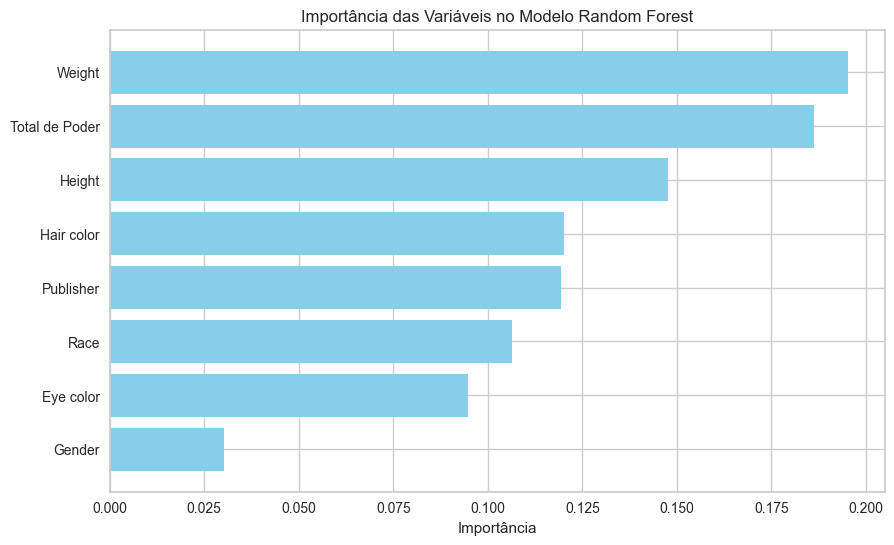

In [72]:
# Plotando as importâncias
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.gca().invert_yaxis()  # Para exibir as variáveis mais importantes no topo
plt.show()

# Comparando os resultados de ambos modelos

In [73]:
# Obtendo as probabilidades previstas para a classe positiva para ambos modelos
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

In [74]:
# Convertendo a variável alvo em binária para a análise ROC
lb = LabelBinarizer()
y_bin = lb.fit_transform(y_test)

In [75]:
# Calculando a curva ROC e a AUC para o modelo Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_bin, y_prob_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [76]:
# Calculando a curva ROC e a AUC para o modelo Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_bin, y_prob_nb, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)

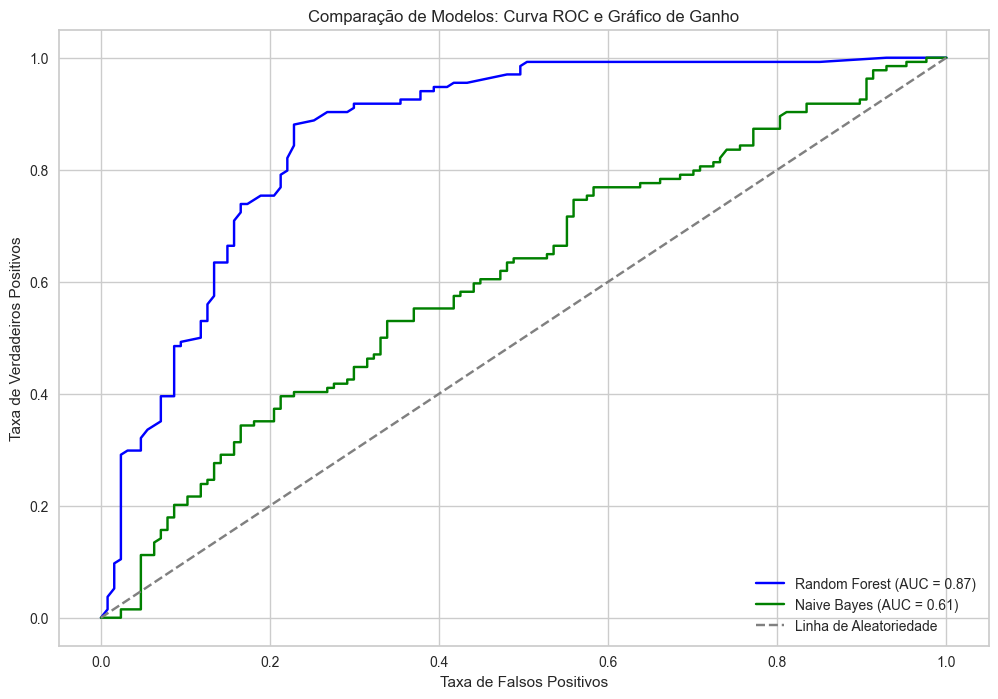

In [77]:
# Plotando o gráfico de ganhos
plt.figure(figsize=(12, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='green', label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Linha de Aleatoriedade')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Comparação de Modelos: Curva ROC e Gráfico de Ganho')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Além do bem e do mal

# Questão 5 - Prevendo o peso dos super-heróis

In [78]:
# Selecionando as variáveis preditoras e a variável alvo
X = super_heroes[['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Total de Poder']]
y = super_heroes['Weight']

In [79]:
# Codificando as variáveis categóricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [80]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# Inicializando o modelo Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [82]:
# Treinando o modelo
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [83]:
# Fazendo previsões
y_pred = rf_regressor.predict(X_test)

In [84]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [85]:
# Exibindo os resultados
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4349.45
R^2 Score: 0.11


In [86]:
# Importância das variáveis
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

Importância das variáveis:
Height: 0.6128
Hair color: 0.1031
Total de Poder: 0.1022
Race: 0.0944
Eye color: 0.0419
Publisher: 0.0299
Gender: 0.0157


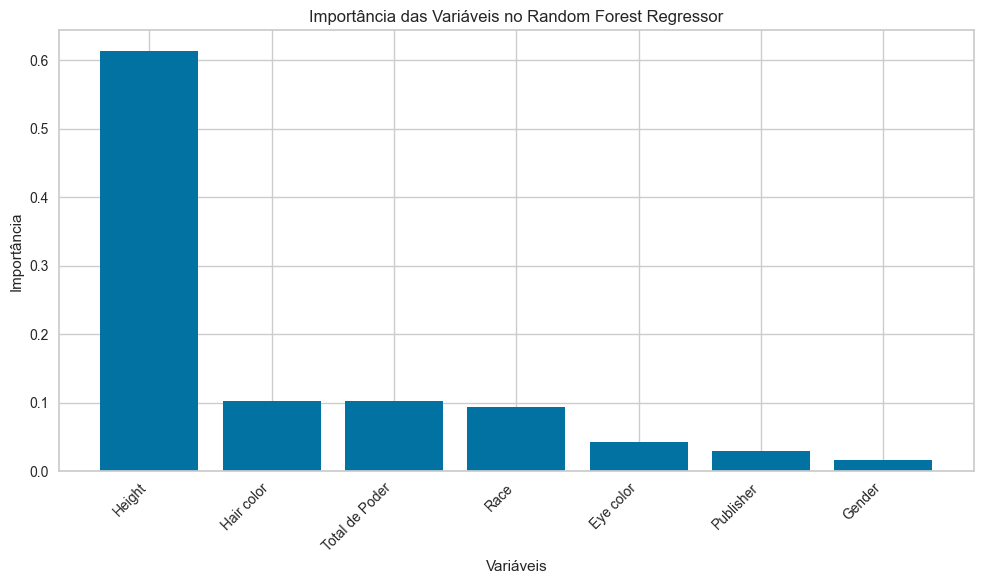

In [87]:
# Exibindo a importância das variáveis
print("Importância das variáveis:")
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

# Plotando a importância das variáveis
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis no Random Forest Regressor")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha="right")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.tight_layout()
plt.show()
